Problem Statement:- Build a Model to predict the profit of a Startup

# Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

# load the dataset

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
x = dataset.iloc[:,0:3].values
y = dataset.iloc[:,-1].values.reshape(-1,1)
print(x)
print(y)

[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]
 [131876.9   99814.71 362861.36]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [120542.52 148718.95 311613.29]
 [123334.88 108679.17 304981.62]
 [101913.08 110594.11 229160.95]
 [100671.96  91790.61 249744.55]
 [ 93863.75 127320.38 249839.44]
 [ 91992.39 135495.07 252664.93]
 [119943.24 156547.42 256512.92]
 [114523.61 122616.84 261776.23]
 [ 78013.11 121597.55 264346.06]
 [ 94657.16 145077.58 282574.31]
 [ 91749.16 114175.79 294919.57]
 [ 86419.7  153514.11      0.  ]
 [ 76253.86 113867.3  298664.47]
 [ 78389.47 153773.43 299737.29]
 [ 73994.56 122782.75 303319.26]
 [ 67532.53 105751.03 304768.73]
 [ 77044.01  99281.34 140574.81]
 [ 64664.71 139553.16 137962.62]
 [ 75328.87 144135.98 134050.07]
 [ 72107.6  127864.55 353183.81]
 [ 66051.52 182645.56 118148.2 ]
 [ 65605.48 153032.06 107138.38]
 [ 61994.4

Normalising the dataset(features and target column)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_n = scaler_x.fit_transform(x)
y_n = scaler_y.fit_transform(y)

# Train Test spiliting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_n, y_n, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 3)
(10, 3)
(40, 1)
(10, 1)


#Defining Neural network

In [ ]:
input_size = X_train.shape[1]
hidden1_size = 16
hidden2_size = 32
output_size = 1
leraning_rate = 0.01
epochs = 100

model = keras.Sequential([
    keras.layers.Dense(16, activation='tanh', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(1)  # Output layer (linear regression)
])

model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
model.summary()

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=2)



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2/2 - 1s - 616ms/step - loss: 2.4849 - mae: 1.3203 - val_loss: 0.5425 - val_mae: 0.6029
Epoch 2/100
2/2 - 0s - 22ms/step - loss: 1.6203 - mae: 1.0419 - val_loss: 0.3280 - val_mae: 0.4685
Epoch 3/100
2/2 - 0s - 34ms/step - loss: 1.0544 - mae: 0.8314 - val_loss: 0.1757 - val_mae: 0.3361
Epoch 4/100
2/2 - 0s - 59ms/step - loss: 0.6360 - mae: 0.6293 - val_loss: 0.1227 - val_mae: 0.2838
Epoch 5/100
2/2 - 0s - 25ms/step - loss: 0.4314 - mae: 0.5054 - val_loss: 0.1094 - val_mae: 0.2742
Epoch 6/100
2/2 - 0s - 28ms/step - loss: 0.3156 - mae: 0.4276 - val_loss: 0.1063 - val_mae: 0.2742
Epoch 7/100
2/2 - 0s - 20ms/step - loss: 0.2473 - mae: 0.3751 - val_loss: 0.1154 - val_mae: 0.2902
Epoch 8/100
2/2 - 0s - 27ms/step - loss: 0.2068 - mae: 0.3470 - val_loss: 0.1203 - val_mae: 0.3079
Epoch 9/100
2/2 - 0s - 27ms/step - loss: 0.1827 - mae: 0.3295 - val_loss: 0.1228 - val_mae: 0.3169
Epoch 10/100
2/2 - 0s - 28ms/step - loss: 0.1664 - mae: 0.3178 - val_loss: 0.1300 - val_mae: 0.3314
Epoch 11

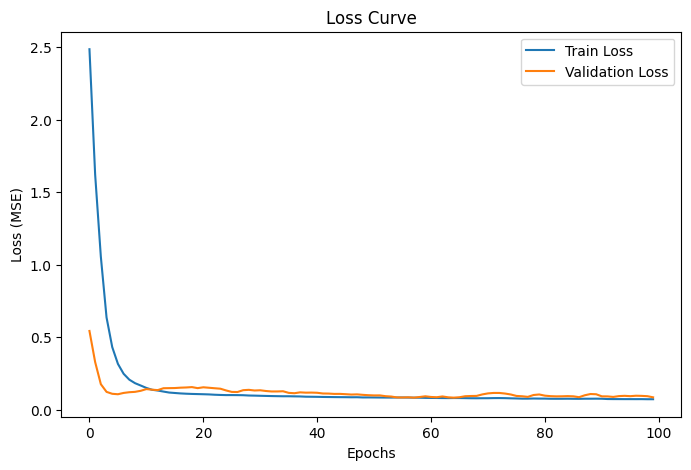

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


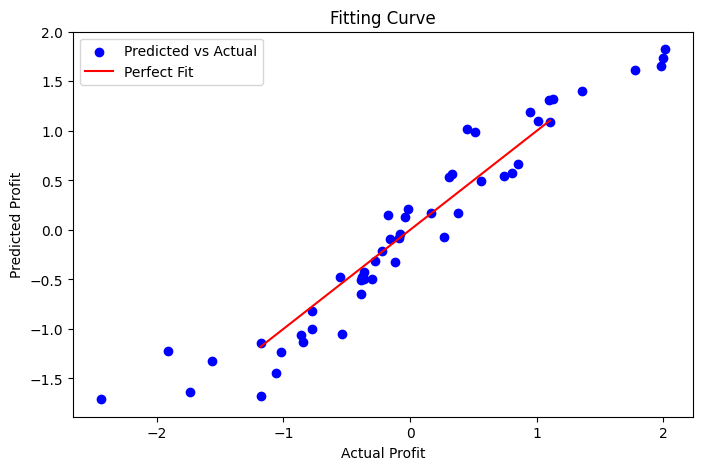

In [ ]:
# Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Predict and plot fitting curve
y_pred = model.predict(x_n)

plt.figure(figsize=(8, 5))
plt.scatter(y_n, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='red', label='Perfect Fit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Fitting Curve')
plt.legend()
plt.show()